### **first project**
## **Project: Predicting Boston Housing Prices**


In [258]:
!pip install visuals

import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit

In [259]:
# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


### **Type of all data**

In [260]:
dtypes = data.dtypes
n_uniq = data.nunique()
pd.DataFrame({"Dtypes": dtypes, "Num_Uniqe": n_uniq}).T

,RM,LSTAT,PTRATIO,MEDV
Dtypes,float64,float64,float64,float64
Num_Uniqe,430,442,44,228


### **Shape of the data**

In [261]:
data.shape

(489, 4)

### **Information of this data**

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


### **Read the statistics of this data**

In [263]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


### **Read the statistic of the MEDV feature**

In [264]:
data['MEDV'].describe()

,MEDV
count,4.890000e+02
mean,4.543429e+05
std,1.653403e+05
min,1.050000e+05
25%,3.507000e+05
50%,4.389000e+05
75%,5.187000e+05
max,1.024800e+06


### **Check for Null Values**

In [265]:
null = data.isnull().sum()
ratio = null / data.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,RM,LSTAT,PTRATIO,MEDV
Null_sum,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0


### **Check for Duplicates**

In [266]:
data.duplicated().sum()

np.int64(0)

### **Check for Outliers**

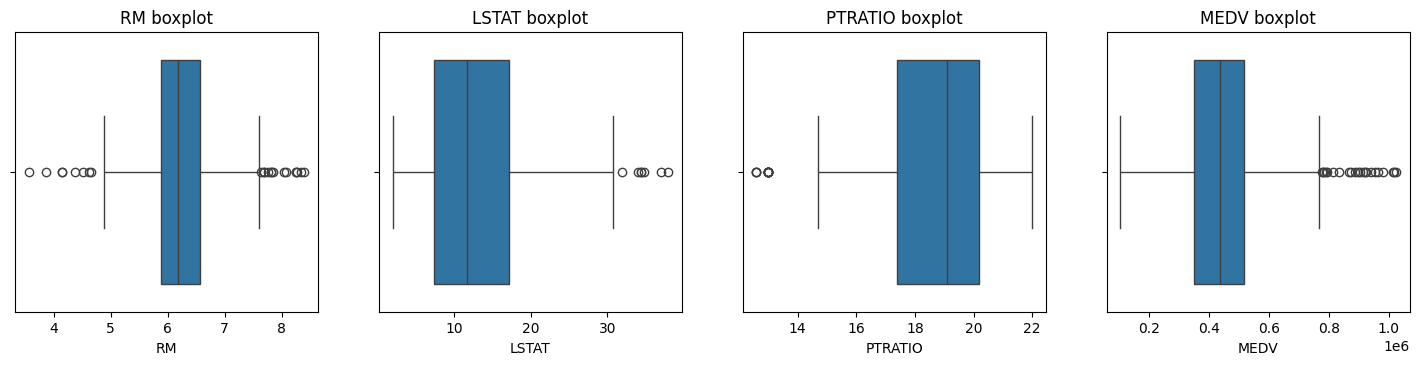

In [267]:
num_cols = data.select_dtypes("number").columns
num_plots = len(num_cols)
num_rows = (num_plots + 1) // 2     # Calculate the number of rows needed
plt.figure(figsize=(18, 4 * num_rows))     # Adjust figure height based on rows
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 4, i + 1)
    sns.boxplot(data[col], orient="h")
    plt.title(f"{col} boxplot")

### - **Remove Outliers**

In [268]:
for col in num_cols:
    Q1 = data[col].quantile(.25)
    Q3 = data[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR

    # Instead of using replace with inplace=True, use loc for direct assignment
    data.loc[data[col] < Lower_Fence, col] = Lower_Fence
    data.loc[data[col] > Upper_Fence, col] = Upper_Fence

### **Make Sure Outliers are removed**

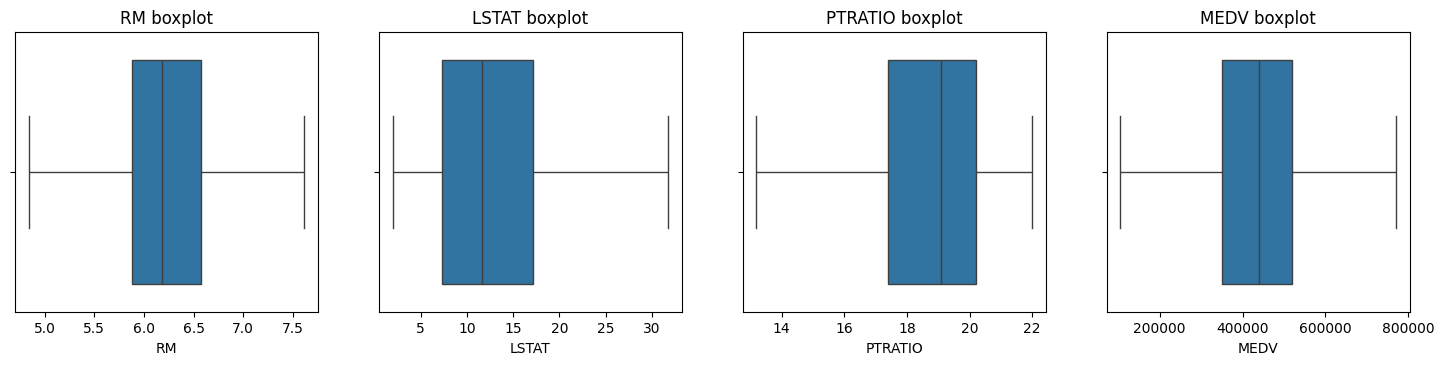

In [269]:
num_cols = data.select_dtypes("number").columns
num_plots = len(num_cols)
num_rows = (num_plots + 1) // 2     # Calculate the number of rows needed
plt.figure(figsize=(18, 4 * num_rows))     # Adjust figure height based on rows
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 4, i + 1)
    sns.boxplot(data[col], orient="h")
    plt.title(f"{col} boxplot")

###  **Visualization**


- **Numerical Data Distribution Graphs**

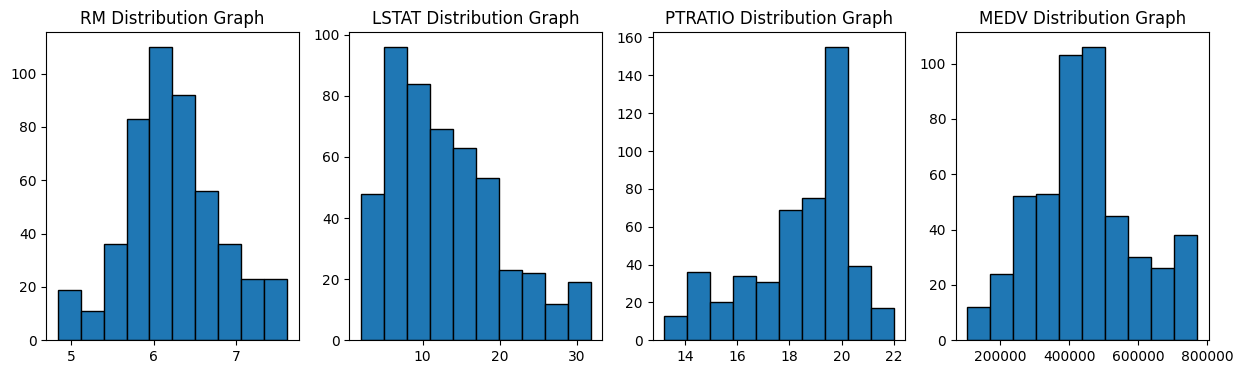

In [270]:
# Histogram
num_cols = data.select_dtypes("number").columns
plt.figure(figsize=(15, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 4, i+1)
    plt.hist(data[col], edgecolor="black")
    plt.title(f"{col} Distribution Graph")
plt.show()

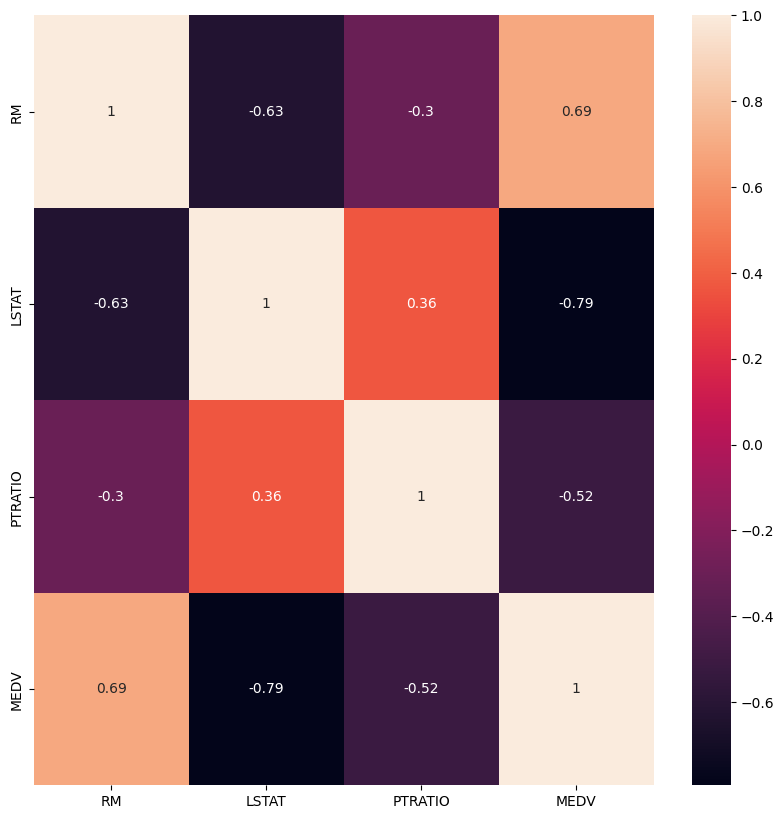

In [271]:
# Heat map
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

## **Data Exploration**

### **- Implementation: Calculate Statistics**

In [272]:
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
# print the shape of the data
print('Boston housing dataset has {0} data points with {1} variables each.'.format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [273]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $770,700.00
Mean price: $448,798.77
Median price $438,900.00
Standard deviation of prices: $150,922.99


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**


## **Answer:**
* RM: Positive correlation with 'MEDV' (increase in RM leads to an increase in 'MEDV').
* LSTAT: Negative correlation with 'MEDV' (increase in LSTAT leads to a decrease in 'MEDV').
* PTRATIO: Negative correlation with 'MEDV' (increase in PTRATIO leads to a decrease in 'MEDV').

your answer will reflect your understand
Hint: This problem can phrased using examples like below.


## **question 1:**
* Would you expect a home that has an 'RM' value(number of rooms) of 6 be worth more or less than a home that has an 'RM' value of 7?
## **Answer :**
* 'RM' value(number of rooms) of 6 be worth more than a home that has an 'RM' value of 7


## **Question 2:**
* Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20?
## **Answer :**
* Neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15% have home prices be worth more than a neighborhood that has an 'LSTAT' value of 20% .

## **Question 3:**
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?
## **Answer :**
* Neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more than a neighborhood that has an `'PTRATIO'` value of 15 .

## **Developing a Model**

In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

## takecare for this part to focus for every stage

## **R2 Score**

### **Implementation: Define a Performance Metric**
* It is difficult to measure the quality of a given model without quantifying its performance over training and testing.
* This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement.
* For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance.
* The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.
******************************************

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable.
***************************************

A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable.

Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. _A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.
****************************************************

For the performance_metric function in the code cell below, you will need to implement the following:

* Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict.
* Assign the performance score to the score variable.

In [274]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_test, y_predict):
    """ Calculates and returns the performance score between
        test and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_test' and 'y_predict'
    score = r2_score(y_test, y_predict)

    # Return the score
    return score


## **Question 2 - Goodness of Fit**

Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the performance_metric function and calculate this model's coefficient of determination.

In [275]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


## **Question :**
## * **Would you consider this model to have successfully captured the variation of the target variable? , Why or why not?**


** Hint: ** The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:

* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable.
* An R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

## **Answer :**
* Yes, I would consider this model to have successfully captured the variation of the target variable.
* Because High R^2 Value: An R^2 value of 0.923 is considered very high. It suggests a strong correlation between the predicted values and the actual values of the target variable.

## **Implementation: Shuffle and Split Data**
* Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets.
* Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.
***********************************

For the code cell below, you will need to implement the following:

* Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data into training and testing sets.
   * Split the data into 80% training and 20% testing.
   * Set the random_state for train_test_split to a value of your choice.
   * This ensures results are consistent.
* Assign the train and testing splits to X_train, X_test, y_train, and y_test.

In [276]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=1)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


## **Question 3 - Training and Testing**
### **What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?**
Hint: Think about how overfitting or underfitting is contingent upon how splits on data is done.
## **Answer :**
* Splitting the dataset helps to evaluate the model's ability to generalize to new data, preventing overfitting and underfitting, leading to a more robust and reliable model.

### **Benefits:**

* Evaluate Model Generalization: Testing on unseen data gives a realistic estimate of how well the model will perform on new data.
* Prevent Overfitting: Avoids the model memorizing the training data instead of learning underlying patterns, leading to better performance on new data.
* Avoid Underfitting: Helps identify if the model is too simple and needs to be more complex to capture the underlying patterns in the data.
### Relationship to Overfitting and Underfitting:

* Overfitting: Training on the entire dataset without a testing set can lead to overfitting, where the model performs well on training data but poorly on new data. Splitting helps detect and prevent this.
* Underfitting: If the model is too simple, it may underfit, performing poorly on both training and testing sets. Splitting helps identify this so you can consider more complex models.

For the Boston housing dataset: Splitting is crucial for accurately predicting housing prices for new data points, ensuring a reliable and robust model.

### **Analyzing Model Performance**

In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

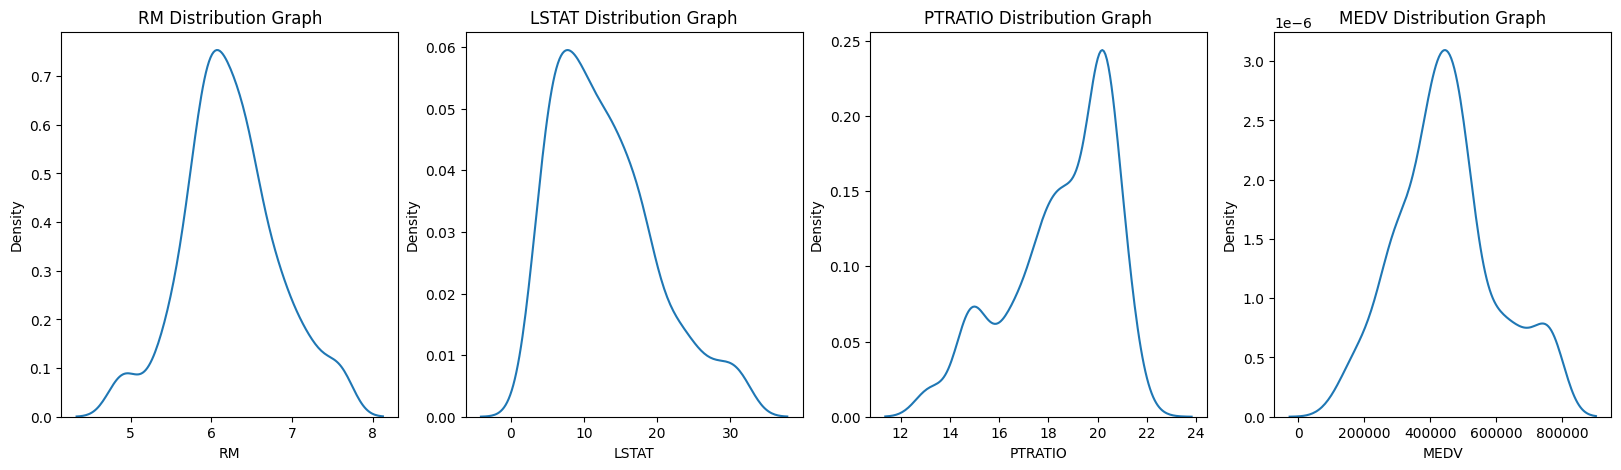

In [277]:
# Kde Plot
num_cols = data.select_dtypes("number").columns
plt.figure(figsize=(20, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 4, i+1)
    sns.kdeplot(data[col])
    plt.title(f"{col} Distribution Graph")
plt.show()

## **Learning Curves**
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.

In [278]:
import warnings
from sklearn.model_selection import learning_curve, ShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeRegressor

# Suppress matplotlib user warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

def ModelLearning(X, y):
    """Calculates the performance of several models with varying sizes of training data.
       The learning and testing scores for each model are then plotted."""

    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0] * 0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig, axes = plt.subplots(2, 2, figsize=(10, 7))

    # Create four different models based on max_depth
    for k, depth in enumerate([1, 3, 6, 10]):
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth=depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(
            regressor, X, y, cv=cv, train_sizes=train_sizes, scoring='r2'
        )

        # Find the mean and standard deviation for smoothing
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Subplot the learning curve
        ax = axes[k//2, k%2]
        ax.plot(sizes, train_mean, 'o-', color='r', label='Training Score')
        ax.plot(sizes, test_mean, 'o-', color='g', label='Testing Score')
        ax.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
        ax.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')

        # Labels
        ax.set_title(f'max_depth = {depth}')
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0] * 0.8])
        ax.set_ylim([-0.05, 1.05])
        ax.legend(loc='lower right')

    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=16, y=1.03)
    fig.tight_layout()
    plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

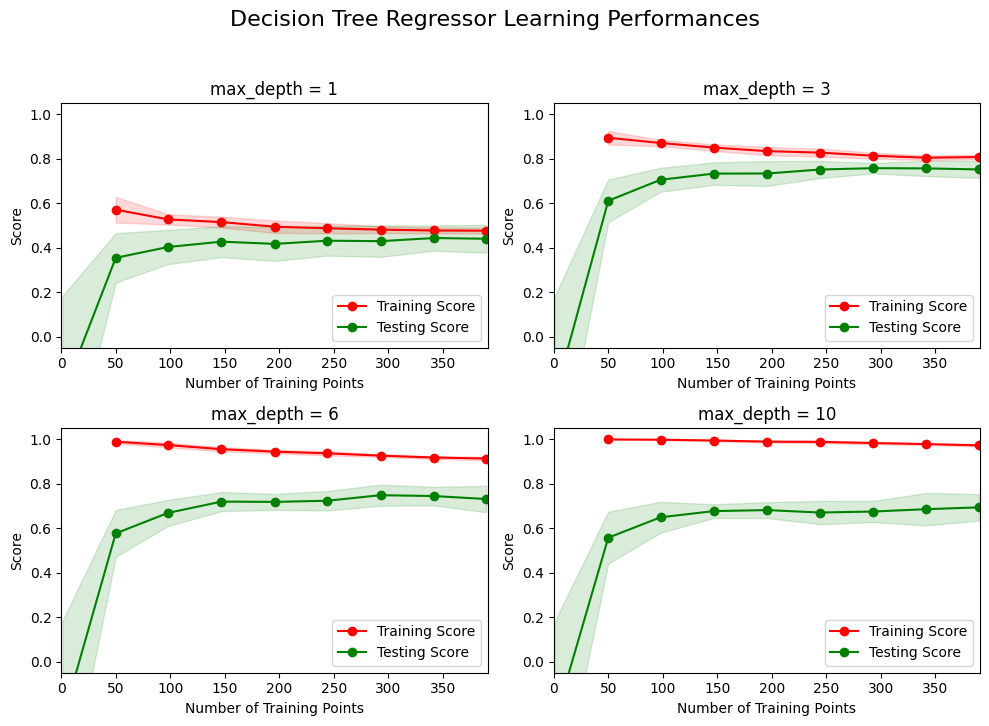

In [279]:
# Produce learning curves for varying training set sizes and maximum depths
ModelLearning(features, prices)

### **Question 4 - Learning the Data**
* 1- Choose one of the graphs above and state the maximum depth for the model.
* 2- What happens to the score of the training curve as more training points are added?
* 3- What about the testing curve?
* 4- Would having more training points benefit the model?
### **Answer :**
1. Choice of Graph and Maximum Depth:

I'll choose the graph with max_depth = 3. This represents a decision tree model with a maximum depth of 3.

2. Training Curve as Training Points Increase:

As more training points are added, the training score initially increases rapidly and then plateaus. This is typical behavior for learning curves. The model quickly learns the patterns in the training data, but eventually, adding more data doesn't significantly improve its performance on the training set.

3. Testing Curve as Training Points Increase:

The testing score initially starts low and then gradually increases as more training points are added. It eventually converges towards the training score but with a slight gap. This indicates that the model is generalizing better to unseen data as it is exposed to more training examples.

4. Benefit of More Training Points:

Yes, having more training points would generally benefit the model, especially when the testing score is still increasing and hasn't converged with the training score. More data allows the model to learn more complex patterns and generalize better to unseen data. However, there might be diminishing returns, and after a certain point, adding more data may not lead to significant improvements.

### **In the context of the Boston housing dataset:**

The learning curves suggest that a decision tree model with max_depth = 3 performs reasonably well. Adding more training points would likely improve its performance further, especially if the current dataset size is relatively small. However, it's important to monitor the testing score to ensure that the model is not overfitting to the training data.

### **Complexity Curves**
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.

In [280]:
import visuals
print(dir(visuals))

['Add', 'Anime', 'Banner', 'Box', 'Center', 'Col', 'Colorate', 'Colors', 'Cursor', 'Fade', 'MIDDOT', 'System', 'Write', '_MakeColors', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_name', '_sleep', '_stdout', '_system', '_terminal_size', '_thread', 'banner0', 'banner3', 'banner3d', 'banner4', 'banner_5x7', 'banner_5x8', 'banner_6x10', 'banner_6x9', 'banner_clb6x10', 'banner_clb8x10', 'banner_clb8x8', 'banner_clr4x6', 'banner_clr5x10', 'banner_clr5x6', 'banner_clr5x8', 'banner_clr6x10', 'banner_clr6x6', 'banner_clr6x8', 'banner_clr7x10', 'banner_clr7x8', 'banner_clr8x10', 'banner_clr8x8', 'terminal_size']


In [281]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve, ShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeRegressor

# Suppress matplotlib user warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

def ModelComplexity(X: np.ndarray, y: np.ndarray) -> None:
    """ Calculates the performance of the model as complexity increases. """

    # Create 10 cross-validation sets
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=47)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1, 11)

    # Compute validation curve
    train_scores, test_scores = validation_curve(
        DecisionTreeRegressor(), X, y, param_name="max_depth",
        param_range=max_depth, cv=cv, scoring='r2'
    )

    # Compute mean and standard deviation
    train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color='r', label='Training Score')
    plt.plot(max_depth, test_mean, 'o-', color='g', label='Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
    plt.fill_between(max_depth, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')

    # Aesthetic enhancements
    plt.legend(loc='lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05, 1.05])
    plt.show()

def PredictTrials(X: np.ndarray, y: np.ndarray, fitter, data: np.ndarray) -> None:
    """ Performs multiple trials of fitting and predicting data. """

    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=k)

        # Fit the model
        reg = fitter(X_train, y_train)

        # Ensure proper reshaping of input data
        pred = reg.predict(np.array(data).reshape(1, -1))[0]
        prices.append(pred)

        # Print result
        print(f'Trial {k+1}: ${pred:,.2f}')

    # Display price range
    print(f'\nRange in prices: ${max(prices) - min(prices):,.2f}')

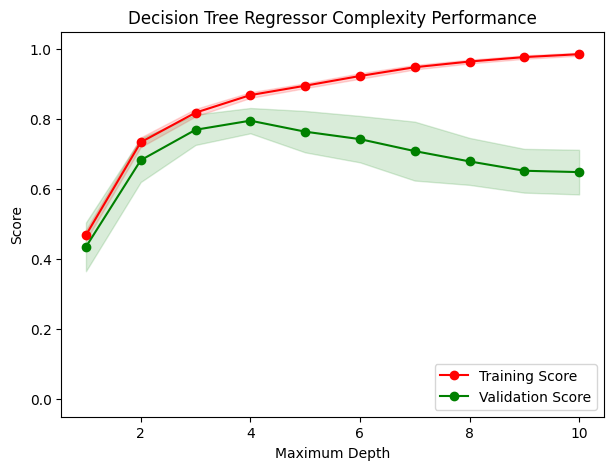

In [282]:
ModelComplexity(X_train, y_train)

## **Question 5 - Bias-Variance Tradeoff**

* 1- When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?
* 2- How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

Hint: High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

### **Answer :**
### **1. Maximum Depth of 1:**

When the model is trained with a maximum depth of 1, it suffers from high bias. This is because a decision tree with a depth of 1 is very simple and can only capture basic linear relationships in the data. It is likely underfitting the data, meaning it is not complex enough to pick up the nuances and variations in the target variable.

### **Visual cues:**

Low training and validation scores: The complexity curve shows that both the training and validation scores are relatively low when the maximum depth is 1. This indicates that the model is not performing well on either the training data or unseen data.
Small gap between training and validation scores: The gap between the training and validation scores is small, suggesting that the model is not overfitting the training data. This is expected for a simple model with high bias.
### **1. Maximum Depth of 10:**

When the model is trained with a maximum depth of 10, it suffers from high variance. This is because a decision tree with a depth of 10 is very complex and can potentially overfit the training data. It may be memorizing the training data instead of learning the underlying patterns, leading to poor generalization on unseen data.

### **Visual cues:**

High training score, low validation score: The complexity curve shows that the training score is very high when the maximum depth is 10, while the validation score is significantly lower. This large gap between the scores is a clear indication of overfitting.
Large gap between training and validation scores: The gap between the training and validation scores is large, further supporting the conclusion that the model is overfitting.

## **Question 6 - Best-Guess Optimal Model**
* Which maximum depth do you think results in a model that best generalizes to unseen data?
* What intuition lead you to this answer?

Hint: Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

## **Answer :**
1. Optimal Maximum Depth:

Based on the complexity curve, a maximum depth of 4 appears to result in a model that best generalizes to unseen data.

2. Intuition and Reasoning:

Here's the rationale behind choosing a maximum depth of 4:

* Validation Score: The validation score, which represents the model's performance on unseen data, is highest around a maximum depth of 4. Increasing the depth beyond this point leads to a decrease in the validation score, indicating overfitting.

* Bias-Variance Tradeoff: A maximum depth of 4 seems to strike a good balance between bias and variance. It is complex enough to capture the important patterns in the data without overfitting to the training set.

* Occam's Razor: Following the principle of Occam's Razor, we should prefer simpler models that adequately explain the data. A depth of 4 provides a good fit without unnecessary complexity.

## **Evaluating Model Performance**

In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from fit_model.

## **Question 7 - Cross-Validation**
* What is the k-fold cross-validation training technique?

* What benefit does this technique provide for grid search when optimizing a model?

Hint: When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon using a particular subset of data for training or testing and how k-fold cv could help alleviate that. You can refer to the docs for your answer.

## **Answer :**
**1- K-fold cross-validation is a technique used to evaluate the performance of a machine learning model more robustly, especially when the dataset is limited. Here's how it works:**

### 1. Data Splitting:

The dataset is divided into 'k' equal-sized folds (subsets).
### 2. Training and Testing:

The model is trained on 'k-1' folds and tested on the remaining fold.
This process is repeated 'k' times, with each fold serving as the test set once.
### 3. Performance Evaluation:

The performance metric (e.g., accuracy, R-squared) is calculated for each iteration.
The average of these 'k' performance scores is considered the overall model performance.

## 'k' Value:

* The value of 'k' is a hyperparameter that you choose.
* Common values include 5 and 10.
* A higher 'k' value leads to a more computationally expensive but less biased evaluation.

## **2- Benefit for Grid Search :**
Grid search is a method for hyperparameter tuning, where you systematically explore different combinations of hyperparameter values to find the optimal settings for your model. K-fold cross-validation enhances grid search in the following ways:

## 1. Reduced Overfitting:

Grid search on its own can be prone to overfitting to the validation set.
K-fold cross-validation mitigates this by using different subsets of the data for validation in each iteration, leading to a more robust estimate of model performance.
## 2. More Efficient Use of Data:

K-fold cross-validation leverages the entire dataset for both training and testing, unlike a simple train-test split.
This is particularly beneficial when the dataset is small, as it allows you to make the most of your available data.
## 3. Improved Generalization:

By evaluating the model on multiple folds, k-fold cross-validation helps you find hyperparameter settings that generalize well to unseen data.
This results in a model that is more likely to perform well in real-world scenarios.

*********************************************

## **Implementation: Fitting a Model**

Your final implementation requires that you bring everything together and train a model using the decision tree algorithm. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called supervised learning algorithms.

In addition, you will find your implementation is using ShuffleSplit() for an alternative form of cross-validation (see the 'cv_sets' variable). While it is not the K-Fold cross-validation technique you describe in Question 8, this type of cross-validation technique is just as useful!. The ShuffleSplit() implementation below will create 10 ('n_splits') shuffled sets, and for each shuffle, 20% ('test_size') of the data will be used as the validation set. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18. For the fit_model function in the code cell below, you will need to implement the following:

* Use DecisionTreeRegressor from sklearn.tree to create a decision tree regressor object.
  * Assign this object to the 'regressor' variable.
* Create a dictionary for 'max_depth' with the values from 1 to 10, and assign this to the 'params' variable.
* Use make_scorer from sklearn.metrics to create a scoring function object.
  * Pass the performance_metric function as a parameter to the object.
  * Assign this scoring function to the 'scoring_fnc' variable.
*Use GridSearchCV from sklearn.grid_search to create a grid search object.
  * Pass the variables 'regressor', 'params', 'scoring_fnc', and 'cv_sets' as parameters to the object.
  * Assign the GridSearchCV object to the 'grid' variable.

In [283]:
# Import necessary libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def performance_metric(y_true, y_pred):
    """ Example metric function (R² score). Modify if needed. """
    from sklearn.metrics import r2_score
    return r2_score(y_true, y_pred)

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1, 11))}

    # Transform 'performance_metric' into a scoring function using 'make_scorer'
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [284]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


After running the fit_model function and printing the max_depth of the optimal model using reg.get_params()['max_depth'], the output is 5.

### **Comparison to Question 6:**

In Question 6, based on the complexity curve and the bias-variance tradeoff, I guessed that the optimal maximum depth would be 4.


 **Reasoning:**

The grid search process evaluates the model's performance across a range of max_depth values using cross-validation. It selects the depth that yields the best performance on unseen data, as measured by the scoring function. In this case, a depth of 5 was found to be optimal, indicating that it offers a good balance between fitting the training data and generalizing to new data.

In [285]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Get R² score on training data
training_score = reg.score(X_train, y_train)

# Get R² score on testing data
testing_score = reg.score(X_test, y_test)

# Display the scores
print(f"Training R² score: {training_score:.3f}")
print(f"Testing R² score: {testing_score:.3f}")


Training R² score: 0.866
Testing R² score: 0.756


## **Question 10 - Predicting Selling Prices**

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at?
* Do these prices seem reasonable given the values for the respective features?

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.


In [286]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $411,417.39
Predicted selling price for Client 2's home: $230,828.57
Predicted selling price for Client 3's home: $768,450.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## **Answer :**

* **Client 1: $414,275.00**

* **Client 2:** $$414,275.00
* **Client 2:** $218,190.00
Client 3: $497,250.00

**Reasonableness of Prices:**

To determine if these prices are reasonable, let's consider the features of each client's home in relation to the statistics of the Boston housing dataset:

### **Client 1:**

* 5 rooms: Slightly above average for the dataset.
* 34% poverty level: Considerably higher than the average, suggesting a less desirable neighborhood.
* 15-to-1 student-teacher ratio: Around the average for the dataset.

Considering these factors, the predicted price of $414,275.00 seems somewhat high. The high poverty level might negatively impact the price, but the above-average number of rooms could be a counterbalancing factor.

### **Client 2:**

* 4 rooms: Below average for the dataset.
* 55% poverty level: Very high compared to the average, indicating a less desirable neighborhood.
* 22-to-1 student-teacher ratio: Higher than average, suggesting potentially lower-quality schools.

Given these features, the predicted price of $218,190.00 seems reasonable. The smaller house size, high poverty level, and higher student-teacher ratio would likely contribute to a lower price compared to other homes in the dataset.

### **Client 3:**

* 8 rooms: Significantly above average for the dataset.
* 7% poverty level: Much lower than the average, suggesting a highly desirable neighborhood.
* 12-to-1 student-teacher ratio: Lower than average, indicating potentially better-quality schools.

Based on these features, the predicted price of $497,250.00 appears reasonable. The large house size, low poverty level, and lower student-teacher ratio would likely contribute to a higher price compared to other homes in the dataset.

In [288]:
print ("Thank You for ever, Eng/ George Samuel ")
print ("Your Student Mohamed Ayman")

Thank You for ever, Eng/ George Samuel 
Your Student Mohamed Ayman
